# Analysis on data aquired

<p>In this notebook we analyze the data parse from all source found in order to explain how during this COVID-19 epidemic the country around the world have performed testo to found infect.<br>
First of all we rerun our notebook to reimport all data with the update.
</p>

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\Eric Boccati\OneDrive\Università\Data science for business\project\data


D:\Programmi\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


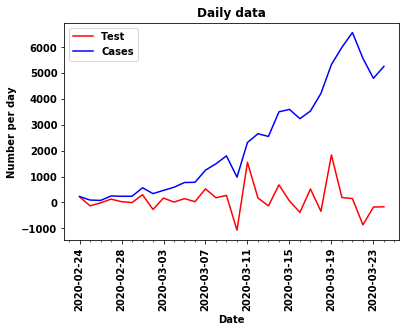

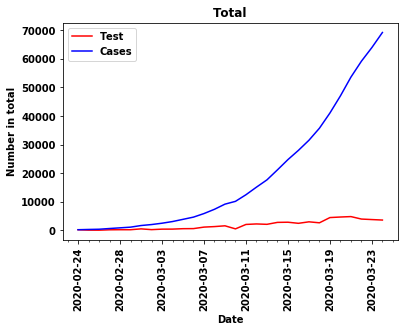

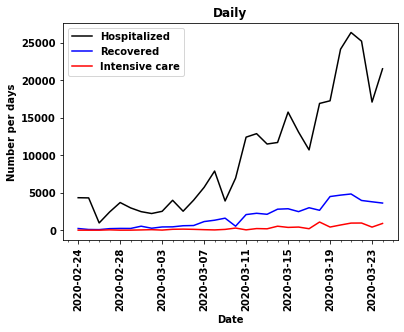

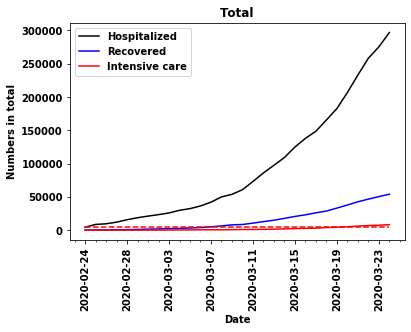

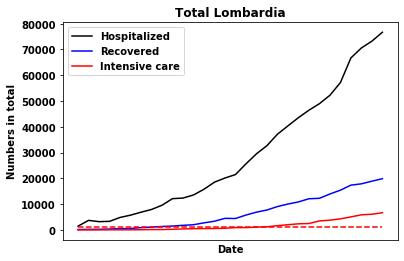

In [2]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_data.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb


UsageError: Line magic function `%dir` not found.
